In [1]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#importing datasets
boston=datasets.load_boston()
X=boston['data']
y=boston['target']

The BayesianRegression class estimates the regression coefficients using

(1σ2X⊤X+1τI)−11σ2X⊤y.

Note that this assumes σ2 and τ are known. We can determine the influence of the prior distribution by manipulationg τ, though there are principled ways to choose τ. There are also principled Bayesian methods to model σ2 (see here), though for simplicity we will estimate it with the typical OLS estimate:

σ^2=SSEN−(D+1),

where SSE is the sum of squared errors from an ordinary linear regression, N is the number of observations, and D is the number of predictors. Using the linear regression model from chapter 1, this comes out to about 11.8.



In [11]:
class BayesianRegression:
    def fit(self,X,y,sigma_squared,tau,add_intercept=True):
        #record info
        if add_intercept:
            ones=np.ones(len(X)).reshape((len(X),1))
            X=np.concatenate((ones, np.array(X)),axis=1)
        self.X=np.array(X)
        self.y=np.array(y)
        
        #fit
        XtX=np.dot(X.T,X)/sigma_squared
        I=np.eye(X.shape[1])/tau
        inverse=np.linalg.inv(XtX+I)
        Xty=np.dot(X.T,y)/sigma_squared
        self.beta_hats=np.dot(inverse,Xty)
        
        #fitted values
        self.y_hat=np.dot(X,self.beta_hats)

In [12]:
sigma_squared=11.8
tau=10
model=BayesianRegression()
model.fit(X,y,sigma_squared,tau)

/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

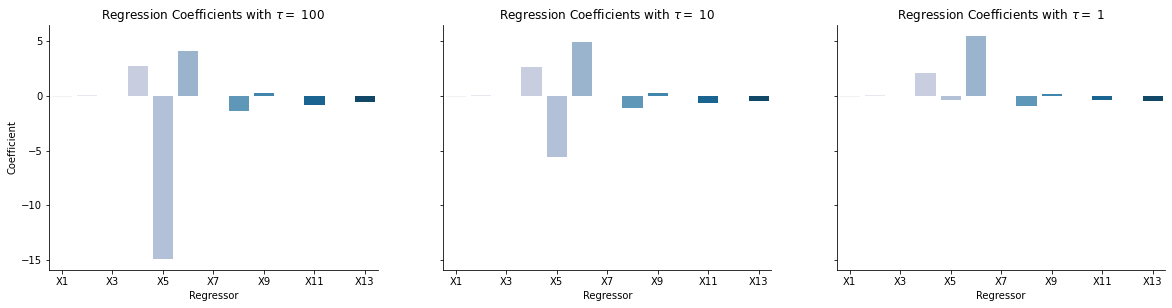

In [13]:
Xs = ['X'+str(i + 1) for i in range(X.shape[1])]
taus = [100, 10, 1]

fig, ax = plt.subplots(ncols = len(taus), figsize = (20, 4.5), sharey = True)
for i, tau in enumerate(taus):
    model = BayesianRegression()
    model.fit(X, y, sigma_squared, tau) 
    betas = model.beta_hats[1:]
    sns.barplot(Xs, betas, ax = ax[i], palette = 'PuBu')
    ax[i].set(xlabel = 'Regressor', title = fr'Regression Coefficients with $\tau = $ {tau}')
    ax[i].set(xticks = np.arange(0, len(Xs), 2), xticklabels = Xs[::2])

ax[0].set(ylabel = 'Coefficient')
sns.set_context("talk")
sns.despine();

In [15]:
#using python lib
from sklearn.linear_model import BayesianRidge

bayes=BayesianRidge()
bayes.fit(X,y);

In [16]:
#as previous discussed
big_number = 10**5

# alpha
alpha = 1/11.8
alpha_1 = big_number*alpha
alpha_2 = big_number

# lambda 
lam = 1/10
lambda_1 = big_number*lam
lambda_2 = big_number

# fit 
bayes_model = BayesianRidge(alpha_1 = alpha_1, alpha_2 = alpha_2, alpha_init = alpha,
                     lambda_1 = lambda_1, lambda_2 = lambda_2, lambda_init = lam)
bayes_model.fit(X, y);